In [ ]:
%matplotlib inline

# The Natural Language Toolkit

There are many packages available for various aspects of text processing (entity extraction and classification are the ones we use most internally).  NLTK is a good place to start because it is relatively straightforward to use and is well documented. 

http://www.nltk.org/
http://www.nltk.org/book

You can install it with the pip installer:

```
pip install nltk
```

It relies on a lot of ancillary data, which can be downloaded with this command, from within python:

```
import nltk
nltk.download()
```

One of the main uses of NLTK is to parse words and sentences.  Here are some examples - note that the third example actually appends parts of speech (POS) to each word. For more details on how best to use these, it is worth going through the NLTK book.

In [41]:
import nltk
import csv

sample_text = ""
with open("data.txt") as f:
    dr = csv.DictReader(f, delimiter="\t")
    for d in dr:
        sample_text = d["mission"].lower()
        break

for sent in nltk.sent_tokenize(sample_text):
    print(sent)

for sent in nltk.sent_tokenize(sample_text):
    print (list(nltk.wordpunct_tokenize(sent)))

for sent in nltk.sent_tokenize(sample_text):
    print(list(nltk.pos_tag(nltk.word_tokenize(sent))))

text = list(nltk.word_tokenize(sample_text))
print(text)

to provide emergency shelter for homeless families & individuals.
['to', 'provide', 'emergency', 'shelter', 'for', 'homeless', 'families', '&', 'individuals', '.']
[('to', 'TO'), ('provide', 'VB'), ('emergency', 'NN'), ('shelter', 'NN'), ('for', 'IN'), ('homeless', 'NN'), ('families', 'NNS'), ('&', 'CC'), ('individuals', 'NNS'), ('.', '.')]
['to', 'provide', 'emergency', 'shelter', 'for', 'homeless', 'families', '&', 'individuals', '.']


One of the challenges dealing with text is the many different word endings.  NLTK provides a set of "stemmers", that is, tools that strip off different word endings, making it easier to identify words in common between documents:

In [15]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer

import nltk
import csv

sample_text = ""
with open("data.txt") as f:
    dr = csv.DictReader(f, delimiter="\t")
    for d in dr:
        sample_text = d["mission"].lower()
        break

text = list(nltk.word_tokenize(sample_text))
print(" ".join(text))

snowball = SnowballStemmer('english')
lancaster = LancasterStemmer()
porter = PorterStemmer()

for stemmer in (snowball, lancaster, porter):
    stemmed_text = [stemmer.stem(t) for t in text]
    print(" ".join(stemmed_text))


to provide emergency shelter for homeless families & individuals .
to provid emerg shelter for homeless famili & individu .
to provid emerg shelt for homeless famy & individ .
to provid emerg shelter for homeless famili & individu .


A more expensive operation is to lemmatize words, that is, to reduce them to the root word, taking into account its part of speech.

In [22]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
import csv

sample_text = ""
with open("data.txt") as f:
    dr = csv.DictReader(f, delimiter="\t")
    for d in dr:
        sample_text = d["mission"]
        break
text = list(nltk.word_tokenize(sample_text.lower()))
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(t) for t in text]
print(" ".join(lemmas))
print(sample_text)


Throngs of rushing of men and women
throng of rushing of men and woman


A common set of tasks for pre-processing text is to remove stopwords (words likely to be irrelevant, like "and" and "the").  This can bold a statement down to its essential terms. 

In [7]:
import string
import nltk
from nltk import WordNetLemmatizer
import csv

sample_text = ""
with open("data.txt") as f:
    dr = csv.DictReader(f, delimiter="\t")
    for d in dr:
        sample_text = d["mission"]
        break

## Module constants
lemmatizer  = WordNetLemmatizer()
stopwords   = set(nltk.corpus.stopwords.words('english'))
punctuation = string.punctuation

def normalize(text):
    results = []
    for token in nltk.word_tokenize(text):
        token = token.lower()
        token = lemmatizer.lemmatize(token)
        if token not in stopwords and token not in punctuation:
            results.append(token)
    return(results)

print (list(normalize(sample_text)))

['provide', 'emergency', 'shelter', 'homeless', 'family', 'individual']


#### Question - can you take all the organization names and mission statements and concatenate them into two files leaving the line breaks intact - one with the original text, and one with the text normalized using the normalization function above?

In [1]:
# ******* Your code here ************

## Working with Corpora

NLTK ships with a variety of document corpora, or collections of documents.  We can also load our own.  A simple way to start is to just load a single file of text. This lets us gather quick statistics about the words in the collection of documents:

The `nltk.text.Text` class is a wrapper around a sequence of simple (string) tokens - intended only for _the initial exploration of text_ usually via the Python interpreter. It has the following methods:

- common_contexts
- concordance
- collocations
- count
- plot
- findall
- index

You shouldn't use this class in production level systems, but it is useful to explore (small) snippets of text in a meaningful fashion.

In [15]:
import nltk
from nltk.corpus.reader import PlaintextCorpusReader
c = PlaintextCorpusReader("./irs990s", "./all_text.txt")
c.words("./all_text.txt")

['shepherd', 'place', 'inc', 'provide', 'emergency', ...]

The corcordance function performs a search for the given token and then also provides the surrounding context:

In [16]:
irs = nltk.text.Text(c.words("./all_text.txt"))
irs.concordance("health")

Displaying 18 of 18 matches:
n springwell work government agency health provider housing entity improve pat
ing entity improve patient resident health satisfaction care reducing cost cas
rograms . environmentmilwaukee area health education center inc mission milwau
ssion milwaukee ahec improve access health care southeastern wisconsin ' s und
culturally - relevant collaborative health profession education program milwau
ing cooperation collaboration among health professional educational institutio
uild bridge develop sustain enhance health family support early education serv
nessee service opportunity recovery health availability research - based menta
vailability research - based mental health addiction treatment technology educ
 late age adult population . mental health carenational family planning coordi
e program activity toward improving health health care delivery particularly m
am activity toward improving health health care delivery particularly medicall
onomic developmentborre

Given some context surrounding a word, we can discover similar words, e.g. words that that occur frequently in the same context and with a similar distribution: Distributional similarity: 

In [22]:
print(irs.similar("education"))

aged
None


As you can see, this takes a bit of time to build the index in memory, one of the reasons it's not suggested to use this class in production code. Now that we can do searching and similarity, find the common contexts of a set of words:

In [23]:
irs.common_contexts(["health", "community"])

No common contexts were found


_your turn, go ahead and explore similar words and contexts - what does the common context mean?_

NLTK also uses matplotlib and pylab to display graphs and charts that can show dispersions and frequency. 

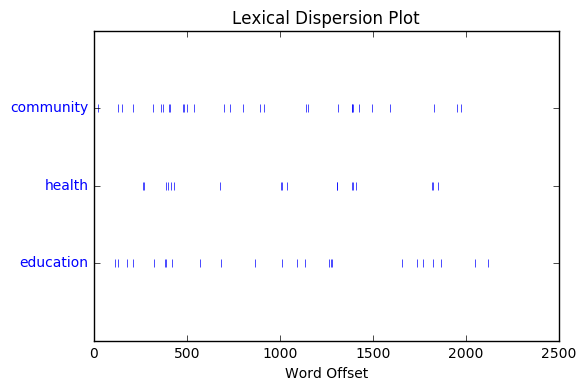

In [25]:
irs.dispersion_plot(["community", "health", "education"])

To explore much of the built in corpus, use the following methods:

These corpora export several vital methods:

- paras (iterate through each paragraph)
- sents (iterate through each sentence)
- words (iterate through each word)
- raw   (get access to the raw text)

https://github.com/alukach/nltk-experiments/blob/master/natural_language_processing_toolkits_cheatsheet.md

In [26]:
c.paras("./all_text.txt")

[[['shepherd', 'place', 'inc', 'provide', 'emergency', 'shelter', 'homeless', 'family', 'individuals', '.', 'homeless', 'shelterwhatcom', 'county', 'north', 'rotary', 'club', 'charitable', 'benevolent', 'service', 'promoting', 'object', 'rotary', 'international', '.', 'community', 'servicerivercity', 'company', 'rivercity', 'company', "'", 's', 'mission', 'assist', 'support', 'chattanooga', 'city', 'hamilton', 'county', 'government', 'promoting', 'managing', 'development', 'vibrant', 'attractive', 'healthy', 'downtown', 'economic', 'social', 'cultural', 'centerpiece', 'chattanooga', 'region', 'rivercity', 'company', 'accomplishes', 'overseeing', 'development', 'downtown', 'real', 'estate', 'making', 'programming', 'great', 'urban', 'space', 'employing', 'creative', 'urban', 'design', 'primary', 'strategic', 'area', 'project', 'initiative', 'completing', 'return', 'river', 'ross', "'", 's', 'landing', '/', 'riverfront', 'district', 'reinvigorating', 'historic', 'commercial', 'core', 'ce

In [34]:
c.sents("./all_text.txt")

[['shepherd', 'place', 'inc', 'provide', 'emergency', 'shelter', 'homeless', 'family', 'individuals', '.', 'homeless', 'shelterwhatcom', 'county', 'north', 'rotary', 'club', 'charitable', 'benevolent', 'service', 'promoting', 'object', 'rotary', 'international', '.', 'community', 'servicerivercity', 'company', 'rivercity', 'company', "'", 's', 'mission', 'assist', 'support', 'chattanooga', 'city', 'hamilton', 'county', 'government', 'promoting', 'managing', 'development', 'vibrant', 'attractive', 'healthy', 'downtown', 'economic', 'social', 'cultural', 'centerpiece', 'chattanooga', 'region', 'rivercity', 'company', 'accomplishes', 'overseeing', 'development', 'downtown', 'real', 'estate', 'making', 'programming', 'great', 'urban', 'space', 'employing', 'creative', 'urban', 'design', 'primary', 'strategic', 'area', 'project', 'initiative', 'completing', 'return', 'river', 'ross', "'", 's', 'landing', '/', 'riverfront', 'district', 'reinvigorating', 'historic', 'commercial', 'core', 'cen

In [28]:
c.words("./all_text.txt")

['shepherd', 'place', 'inc', 'provide', 'emergency', ...]

In [29]:
c.raw("./all_text.txt")[:200]

'shepherd place inc provide emergency shelter homeless family individuals.homeless shelterwhatcom county north rotary club charitable benevolent service promoting object rotary international.community '

_Your turn! Explore some of the text in the available corpora_

## Frequency Analyses

In statistical machine learning approaches to NLP, the very first thing we need to do is count things - especially the unigrams that appear in the text and their relationships to each other. NLTK provides two very excellent classes to enable these frequency analyses:

- `FreqDist`
- `ConditionalFreqDist` 

And these two classes serve as the foundation for most of the probability and statistical analyses that we will conduct.

First we will compute the following:

- The count of words
- The vocabulary (unique words)
- The lexical diversity (the ratio of word count to vocabulary)

In [30]:
counts  = nltk.FreqDist(c.words("./all_text.txt"))
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

print("Corpus has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv))

Corpus has 1028 types and 2118 tokens for a lexical diversity of 2.060


In [31]:
counts.B()

1028

In [32]:
print(counts.most_common(40)) # The n most common tokens in the corpus

[('.', 75), ('inc', 40), ('provide', 30), ('community', 30), ('-', 27), ('school', 25), ('education', 24), ('service', 22), ('support', 21), ('health', 18), ('child', 17), ('organization', 14), ('promote', 14), ('family', 13), ('area', 13), ('s', 12), ("'", 12), ('mission', 12), ('program', 12), ('public', 12), ('student', 12), ('secondary', 11), ('club', 11), ('educational', 10), ('care', 9), ('housing', 9), ('development', 9), ('access', 9), ('learning', 9), ('foundation', 9), ('individual', 9), ('county', 8), ('association', 8), ('district', 8), ('food', 7), ('opportunity', 7), ('high', 7), ('financial', 7), ('member', 7), ('economic', 7)]


In [35]:
print( counts.max()) # The most frequent token in the corpus

.


In [36]:
print(counts.hapaxes()[0:10])  # A list of all hapax legomena (single-occurrence words)

['shepherd', 'network', 'river', 'brattleboro', 'east', 'tuition', 'necessary', 'animal', 'stop', 'entertain']


In [37]:
counts.freq('community') * 100 # percentage of the corpus for this token

1.41643059490085

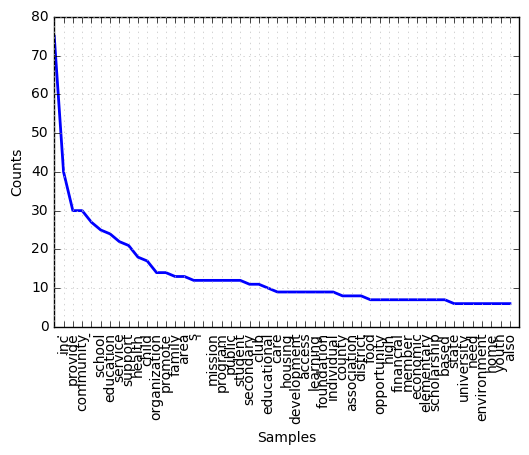

In [38]:
counts.plot(25, cumulative=False)

## Todo - add section on document similarity and tf/idf 

## Named Entity Recognition

NLTK has an excellent MaxEnt backed Named Entity Recognizer that is trained on the Penn Treebank. You can also retrain the chunker if you'd like - the code is very readable to extend it with a Gazette or otherwise. 

In [40]:
import nltk

with open("irs990s/all_text.txt") as f:
    text= f.read()
    print(nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(text))))

(S
  shepherd/JJ
  place/NN
  inc/NN
  provide/VBP
  emergency/NN
  shelter/NN
  homeless/NN
  family/NN
  individuals.homeless/NN
  shelterwhatcom/VBD
  county/JJ
  north/JJ
  rotary/JJ
  club/NN
  charitable/JJ
  benevolent/JJ
  service/NN
  promoting/VBG
  object/JJ
  rotary/JJ
  international.community/NN
  servicerivercity/NN
  company/NN
  rivercity/NN
  company/NN
  's/POS
  mission/NN
  assist/NN
  support/NN
  chattanooga/VBP
  city/NN
  hamilton/NN
  county/JJ
  government/NN
  promoting/VBG
  managing/VBG
  development/NN
  vibrant/JJ
  attractive/JJ
  healthy/JJ
  downtown/JJ
  economic/JJ
  social/JJ
  cultural/JJ
  centerpiece/NN
  chattanooga/JJ
  region/NN
  rivercity/NN
  company/NN
  accomplishes/VBZ
  overseeing/VBG
  development/NN
  downtown/JJ
  real/JJ
  estate/NN
  making/VBG
  programming/VBG
  great/JJ
  urban/JJ
  space/NN
  employing/VBG
  creative/JJ
  urban/JJ
  design/NN
  primary/JJ
  strategic/JJ
  area/NN
  project/NN
  initiative/JJ
  completing/VBG
 

You can also wrap the Stanford NER system, which many of you are also probably used to using.

Pending - a section on classification.

## Exercises

### Preprocessing

The primary responsibility you will have before any task involving NLP is to ingest and transform raw text into a corpus that can then be used for performing further evaluations. NLTK provides many corpora for you to work with for exploration, but you must become able to design and construct your own corpora, and to implement `nltk.CorpusReader` objects - classes that in a memory safe and efficient way are able to read entire corpora and analyze them. 

Many people get away with the `nltk.PlainTextCorpusReader` - which uses built-in taggers and tokenizers to deal with raw text. However, this methodology leaves you at the mercy of the tagging model that you have provided, and does not allow you to make corrections that are saved in between runs. Instead you should preprocess your text to allow it to be read by the `nltk.corpus.TaggedCorpusReader` or the penultimate corpus, the `nltk.corpus.BracketParseCorpusReader`. 

In this task, you will transform raw text into a format that can then be read by the `nltk.corpus.TaggedCorpusReader`. See the documentation at [http://www.nltk.org/api/nltk.corpus.reader.html](http://www.nltk.org/api/nltk.corpus.reader.html) for more information on this reader. 

You will find 20-40 documents of recent tech articles from Engadget and Tech Crunch at the following link: [http://bit.ly/nlpnltkcorpus](http://bit.ly/nlpnltkcorpus) - please download them to your local file system. Write a Python program that uses NLTK to preprocess these documents into a format that can be easily read by the `nltk.corpus.TaggedCorpusReader`. 

Note that you will have to process these files and remove HTML tags and you might have to do other tasks related to the clean up; to do this I suggest you use the third party library BeautifulSoup which can be found at [http://www.crummy.com/software/BeautifulSoup/](http://www.crummy.com/software/BeautifulSoup/). See also Chapter 3 in the NLTK book for more information.

#### Evaluation

1. What is the word count and vocabulary of this corpus?
2. What is the lexical diversity of the corpus?
3. What are the 5 most common lexical categories (parts of speech)?
4. What are the 10 most common unigrams, the 10 most common bigrams? (please exclude stopwords, using the `nltk.corpus.stopwords('english')` list)
5. How many nouns are in the corpus?

### Parsing

Given a seed inventory of pre-terminal and non-terminal symbols (grammatical categories) and a sample lexicon, write a grammar for English noun phrases. Your grammar should cover all legal structures of noun phrases used by the grammatical categories provided. You must include the following:

- noun-noun compounds ("brick wall", "lawn chair")
- relative clauses of the form Rel-Cl ⟶ Rel-Pro V NP ("[the ball] that hit her") 

**Note:** You do not need to cover more than one PP in a row, more than one adjective in a row, noun-noun compounds of length > 2, quantifiers followed by determiners ("all of these") or mass nouns ("beer", "sincerity")

You should then write a program that uses an NLTK parser and the grammar you constructed that will return a syntactic tree if the input is a noun phrase or None if the input is ungrammatical. Your program will have to take the input sentence, tokenize it and then tag it according to the lexicon (you can assume that words in this lexicon do not have multiple senses) - you'll then have to pass the grammar phrase (the tags) to the parser.

#### Tagset

    N = noun
    NP = noun phrase
    Adj = adjective
    AdjP = adjective phrase
    Adv = adverb
    Prep = preposition
    PP = prepositional phrase
    Quant = quantifier
    Ord = ordinal numeral
    Card = cardinal numeral	Rel-Cl = relative clause
    Rel-Pro = relative pronoun
    V = verb
    S = sentence
    Det = determiner
    Dem-Det = demonstrative determiner
    Wh-Det = wh-determiner
    PPron = personal pronoun
    PoPron = possessive pronoun

#### Sample Lexicon

    a            Det
    an           Det
    at           Prep
    airplane     NSg
    airplanes    NPl
    airport      NSg
    airports     NPl
    any          Quant
    beautiful    Adj
    big          Adj
    eat          V
    eats         V3Sg
    finished     VPastPP
    four         Card
    fourth       Ord
    he           PPron
    his          PoPron
    in           Prep
    many         Quant
    my           PoPron
    new          Adj
    of           Prep
    offered      VPastPP
    on           Prep
    restaurant   NSg
    restaurants  NPl
    runway       NSg
    runways      NPl
    second       Ord
    some         Quant
    that         Dem-DetSg
    that         Rel-Pro
    the          Det
    this         Dem-DetSg
    these        Dem-DetPl
    third        Ord
    those        Dem-DetPl
    three        Card
    two          Card
    very         Adv
    which        Wh-Det
    who          Wh-Det
    you          PPron

#### Evaluation Phrases

- "Four new airports"
- "Very new airport runways"
- "His second house"
- "Some beautiful dishes which a restaurant offered"
- "The runway that the airport built"

### Document Classification

In the first week you created an ingestion mechanism and an NLTK corpus reader for a set of RSS feeds. These feeds potentially have topics associated with them (broad tags like tech, news, sports, etc). In this question you'll build a classifier on a data set of RSS feeds that is provided in the course materials to decide whether or not you can categorize the various topics using one of the classifiers you learned in this week.

The corpus is constructed as follows. Each individual blog post is in its own HTML file stored in a directory labled with the topic. Use the `nltk.CategorizedCorpusReader` or the `nltk.CategorizedPlaintextCorpusReader` to construct your corpora (you may review how the movie reviews data set is structured). To do this you need to pass to the corpus the path to the root of your corpus, and a regular expression to match file names. You also need to use a regular expression passed as the `cat_pattern` keyword argument, which is used to match the category labels. Here is an example for the spam corpus:

    from nltk.corpus import CategorizedPlaintextCorpusReader as EmailCorpus

    corpus   = EmailCorpus("./data/nbspam", r'(?!\.).*\.[a-f0-9]+',
                   cat_pattern=r'(spam|ham)/.*', encoding='iso-8859-1')

    print corpus.categories()
    print corpus.fileids()

Create a test set, a dev test set, and a training set from randomly shuffled documents that are in the corpus to use in your development. Save these sets to disk with pickles to ensure that you can develop easily with them.

Create a function that extracts features per document. Choose any features you would like. One idea is to use the most common unigrams; you might be able to use common bigrams as well. If you can think of any other features, feel free to include them as well (maybe an includes_recipe feature, etc.)) You may want to consider a TF-IDF feature to improve your results.

Train the classifier of your choice on the training data, and then improve it with your dev set. Report your final accuracy and the most informative features by running the accuracy checker on the final test set.

#### Evaluation

1. Report accuracy and most informative features of classifier (4 points)
2. Show complete work with submitted Python code (6 points)
3. Create a corpus reader that extends a built-in NLTK corpus reader (4 points)
4. Create an efficient feature extractor (4 points)
5. Achieve an accuracy with your classifier of greater than 85% (2 points)

### Product Classification

The second question involves comparing and contrast the Naive Bayes Classifier with the Maximum Entropy classifier. You will be given an abbreviated data set of product names and their descriptions as well as their label (tops, bottoms, shoes, etc.) - similarly to question one, create a corpus that can read the CSV file - you may want to look at the `nltk.corpus.WordListCorpusReader` for inspiration about how to create such a corpus (each product is on a single line).

Create test and training sets from the data then build both a NaiveBayes and Maxent classifier - make sure that you save these classifiers to disk using the `pickle` module! The Maxent classifier in particular will take a long time to train. Once they're trained; report the accuracy of each as well as the most informative features. Are there any surprises? Which classifier performs better?


## Answers - don't peek!

In [ ]:
with open("data_with_subjects.txt") as f:
    dr = csv.DictReader(f, delimiter="\t")
    with open("./irs990s/all_text.txt", "w") as fw:
        for d in dr:
            normalized_words = normalize(d["name"] + " " + d["mission"] + d["subject"])
            fw.writelines(" ".join(normalized_words))

print ("All done!"